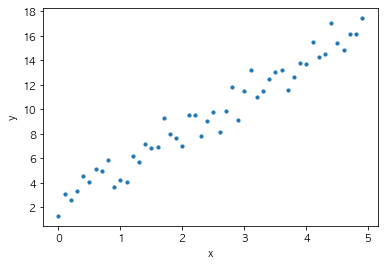

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 주피터 내장
%matplotlib inline
# 한글처리 
import platform
from matplotlib import font_manager, rc

# 한글처리
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
#     font_list_mac = fm.OSXInstalledFonts()
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Linux': # 리눅스
    rc( 'font', family='NanumGothic' )
elif platform.system() == 'Windows': # 윈도우
    # 폰트 차후 확인
    # fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family='NanumGothic' )
else:
    print('알수없는 시스템. 미적용')

np.random.seed(13)
X = np.arange(0, 5, 0.1)
y = 2 + 3 * X + np.random.randn(len(X))

X = X.reshape(len(X), 1)

plt.scatter(X, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
from sklearn import linear_model

clf = linear_model.SGDRegressor(max_iter=100, verbose=1)
clf.fit(X, y)

-- Epoch 1
Norm: 2.98, NNZs: 1, Bias: 0.975621, T: 50, Avg. loss: 10.234831
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.21, NNZs: 1, Bias: 1.101417, T: 100, Avg. loss: 0.814226
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.26, NNZs: 1, Bias: 1.163781, T: 150, Avg. loss: 0.634951
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.28, NNZs: 1, Bias: 1.209836, T: 200, Avg. loss: 0.608561
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.25, NNZs: 1, Bias: 1.240424, T: 250, Avg. loss: 0.596855
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 3.26, NNZs: 1, Bias: 1.276383, T: 300, Avg. loss: 0.587079
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 3.24, NNZs: 1, Bias: 1.303611, T: 350, Avg. loss: 0.578871
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 3.23, NNZs: 1, Bias: 1.330905, T: 400, Avg. loss: 0.570774
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 3.23, NNZs: 1, Bias: 1.360160, T: 450, Avg. loss: 0.562177
Total training time: 0.00 seconds.
-

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=1,
             warm_start=False)

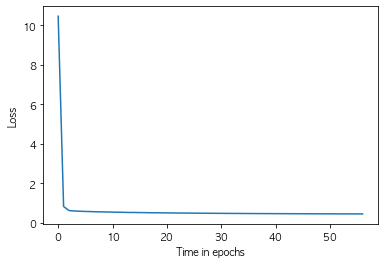

In [6]:
import sys
import io
import matplotlib.pyplot as plt

sys.stdout = io.StringIO()

clf.fit(X, y)

loss_history = sys.stdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))

plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

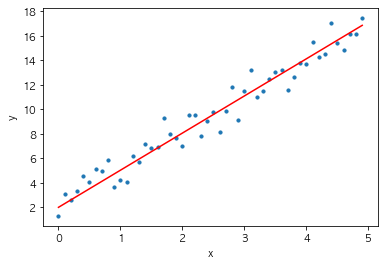

In [7]:
y_predicted = clf.predict(X)

plt.scatter(X, y, s=10)
plt.plot(X, y_predicted, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
import pandas as pd
import numpy as np

In [50]:
maindata = pd.read_csv('./output/maindata.csv')

In [51]:
del maindata["평년"]
del maindata["현재일기"]

In [52]:
maindata.head()

,날짜,평균,현재기온,이슬점온도,체감온도,강수량,습도,풍향,풍속,해면기압,태풍
0,2015-01-02,1287,2.1,-15.4,-2.3,0.0,26.0,북서,17.6,1021.4,x
1,2015-01-05,1287,10.4,-3.3,10.4,0.0,38.0,서북서,2.9,1017.9,x
2,2015-01-06,1303,9.1,-16.2,6.7,11.5,15.0,북서,15.8,1011.3,x
3,2015-01-07,1277,2.5,-28.5,-1.6,0.0,8.0,북서,16.9,1018.0,x
4,2015-01-08,1352,3.3,-19.4,-0.1,0.0,17.0,북서,13.7,1022.8,x


In [53]:
maindata.shape

(1188, 11)

In [54]:
maindata.태풍.unique()

array(['x', 'o'], dtype=object)

In [60]:
maindata.loc[1].태풍

0

In [58]:
def tornado(tmp):
    if tmp == 'x':
        return 0
    else:
        return 3000
    

In [56]:
maindata['태풍'] = maindata['태풍'].apply(tornado)

In [57]:
maindata[maindata['태풍'] == 3000]

,날짜,평균,현재기온,이슬점온도,체감온도,강수량,습도,풍향,풍속,해면기압,태풍
121,2015-06-30,1888,20.7,20.3,69.0,4.0,98.0,남남서,4.0,1000.9,3000
122,2015-07-01,1881,26.4,19.0,75.0,0.1,64.0,남남동,16.6,996.4,3000
123,2015-07-02,1837,25.9,15.2,73.0,0.0,52.0,남남동,16.9,1002.7,3000
124,2015-07-03,1850,30.4,10.3,76.0,0.0,29.0,북서,6.5,1004.3,3000
125,2015-07-06,1957,24.7,16.1,72.0,0.0,59.0,남동,16.9,1011.7,3000
...,...,...,...,...,...,...,...,...,...,...,...
1119,2019-09-20,2020,26.3,14.7,73.0,0.0,49.0,남남동,6.8,1016.2,3000
1120,2019-09-23,2075,20.7,16.3,68.0,0.5,76.0,남남동,3.2,1015.0,3000
1125,2019-09-30,2068,29.3,22.7,80.0,0.0,68.0,남남동,11.9,1016.4,3000
1126,2019-10-01,2086,23.4,22.0,23.4,9.0,92.0,서북서,6.8,1020.2,3000


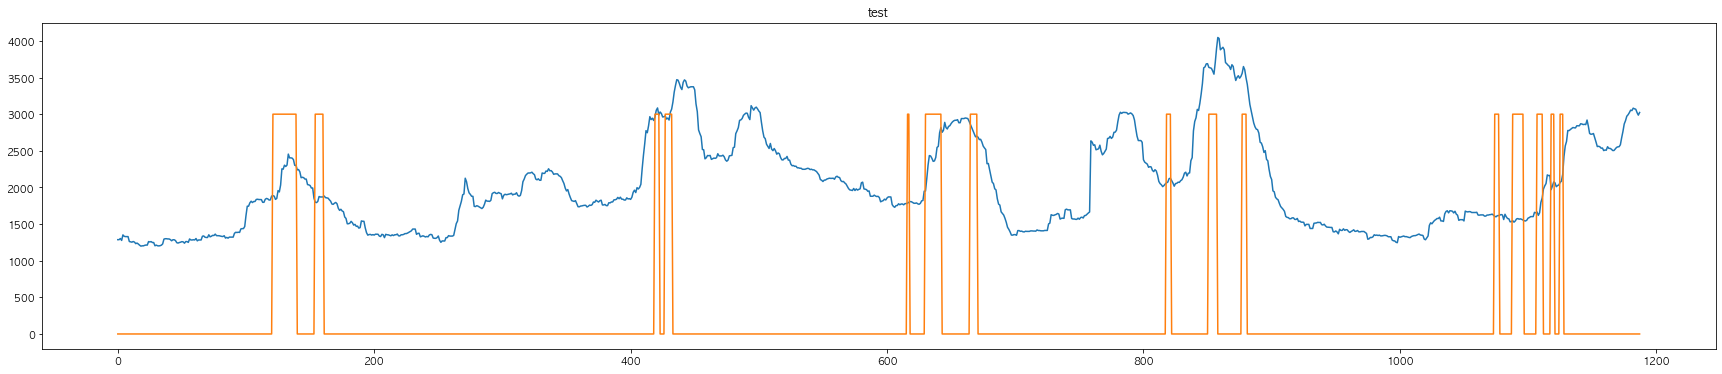

In [87]:
plt.rcParams['figure.figsize'] = [30, 6]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(maindata.평균)
ax.set_title('test')

ax.plot(maindata.태풍)

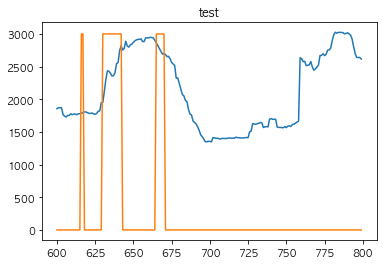

In [82]:
# df = maindata.iloc[0:200]

# df = maindata.iloc[200:400]

# df = maindata.iloc[400:600]

df = maindata.iloc[600:800]


print(df.iloc[0,[0]])
print(df.iloc[-1,[0]])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(df.평균)
ax.set_title('test')

ax.plot(df.태풍)

In [83]:
maindata.iloc[600].날짜

'2017-06-09'

In [84]:
maindata.iloc[800].날짜

'2018-06-01'